,breed_group,sex,sterilization_status,Noise.sensitivity_age,Fearfulness_age,Aggression_age,Surface_age,Separation_age,Impulsivity_age,Personality_age,...,Vas_8_excessive,Vas_9_alwaysplay,Vas_10_complicatedtasks,Vas_11_reacthastily,Vas_12_easilydistracted,Vas_13_cannotwait,impulsive,impulsiveness_disturbes,inattention_score,impulsivity_score
dog.id,,,,,,,,,,,,,,,,,,,,,
1,Jack_Russell_Terrier,female,sterilized,14.241650,14.181420,14.236174,14.233437,14.181420,14.236174,14.044534,...,2.0,3.0,2.0,2.0,3.0,2.0,0.0,3.0,0.993593,0.097521
2,Jack_Russell_Terrier,female,intact,8.693866,8.359294,8.693866,8.353818,NaN,8.422270,8.685652,...,2.0,3.0,1.0,1.0,2.0,2.0,NaN,2.0,-0.633266,0.904661
3,Pinschers_Schnauzers,male,intact,1.992701,1.992701,1.992701,1.992701,1.992701,1.992701,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,NaN,NaN
4,Pinschers_Schnauzers,male,sterilized,5.405751,5.405751,5.405751,5.405751,5.405751,5.405751,NaN,...,1.0,2.0,1.0,2.0,2.0,1.0,1.0,2.0,-0.528441,-0.822966
5,German_Shepherd_Dog,male,sterilized,3.875205,4.006568,3.875205,4.006568,4.006568,4.006568,4.006568,...,3.0,3.0,2.0,2.0,4.0,2.0,1.0,5.0,0.347356,1.438794


Text(0, 0.5, 'Count')

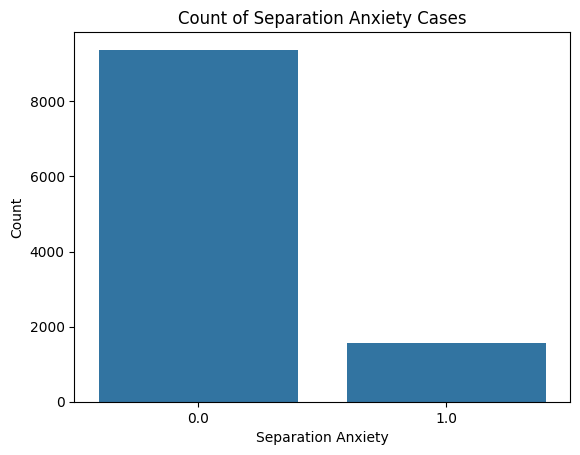

In [42]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import Markdown


dogs = pd.read_csv("psy_data.csv", header=0).set_index("dog.id")
display(dogs.head())

subset = dogs.loc[:, ['Separation_age', 'Leaving_pant', 'Leaving_vocalization', "Leaving_salivate", "Leaving_restless", "Alone_destroy", "Alone_urinate", "Alone_vocalize", "Alone_pant", "separation_anxiety", "separation_behavior_score","breed_group"]]
# subset = subset.query("separation_behavior_score > 1")
# sns.lineplot(subset,y = "Separation_age", x= "separation_behavior_score")
sns.countplot(data=subset, x="separation_anxiety")
plt.title("Count of Separation Anxiety Cases")
plt.xlabel("Separation Anxiety")
plt.ylabel("Count")


In [44]:

fig = px.scatter(
    subset,
    x="Separation_age",
    y="separation_behavior_score",
    color="breed_group",
    hover_data=["breed_group"],
    title="Separation Age vs Behavior Score by Breed Group"
)

fig.update_layout(
    xaxis_title="Separation Age (weeks)",
    yaxis_title="Separation Behavior Score",
    legend_title="Breed Group"
)